<a href="https://colab.research.google.com/github/N2000-hack/Machine-Learning-LAB/blob/main/Exp_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
data=[[1.713,1.586,0],[0.180,1.786,1],[0.353,1.240,1],[0.940,1.566,0],[1.486,0.759,1],[1.266,1.106,0],[1.540,0.419,1],[0.459,1.799,1],[0.773,0.186,1]]

In [2]:
import pandas as pd
df=pd.DataFrame(data,columns=['Var1','Var2','Class'])

In [3]:
df.describe()

,Var1,Var2,Class
count,9.000000,9.000000,9.000000
mean,0.967778,1.160778,0.666667
std,0.563071,0.593125,0.500000
min,0.180000,0.186000,0.000000
25%,0.459000,0.759000,0.000000
50%,0.940000,1.240000,1.000000
75%,1.486000,1.586000,1.000000
max,1.713000,1.799000,1.000000


In [4]:
df

,Var1,Var2,Class
0,1.713,1.586,0
1,0.180,1.786,1
2,0.353,1.240,1
3,0.940,1.566,0
4,1.486,0.759,1
5,1.266,1.106,0
6,1.540,0.419,1
7,0.459,1.799,1
8,0.773,0.186,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var1    9 non-null      float64
 1   Var2    9 non-null      float64
 2   Class   9 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 344.0 bytes


In [6]:
list(df.columns)

['Var1', 'Var2', 'Class']

In [7]:
X=df.iloc[:,[0,1]].values
X

array([[1.713, 1.586],
       [0.18 , 1.786],
       [0.353, 1.24 ],
       [0.94 , 1.566],
       [1.486, 0.759],
       [1.266, 1.106],
       [1.54 , 0.419],
       [0.459, 1.799],
       [0.773, 0.186]])

In [8]:
Y=df.iloc[:,[2]].values
Y

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1]])

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 25)
Y_kmeans = kmeans.fit_predict(X)
df['cluster']=Y_kmeans

In [10]:
Y_kmeans

array([1, 2, 2, 1, 0, 1, 0, 2, 0], dtype=int32)

In [11]:
#predict classification where VAR1=0.906 and VAR2=0.606
kmeans.predict([[0.906,0.606]])

array([0], dtype=int32)

In [12]:
centroids = kmeans.cluster_centers_
cen_X = [i[0] for i in centroids] 
cen_Y = [i[1] for i in centroids]
df['cen_X'] = df.cluster.map({0:cen_X[0], 1:cen_X[1], 2:cen_X[2]})
df['cen_Y'] = df.cluster.map({0:cen_Y[0], 1:cen_Y[1], 2:cen_Y[2]})
colors = ['#006400', '#800000', '#4B0082']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

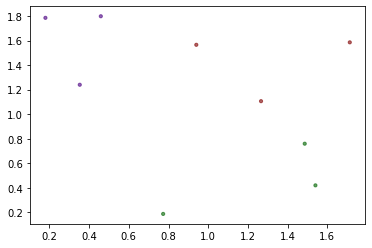

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df.Var1, df.Var2, c=df.c, alpha = 0.6, s=10)